<a href="https://colab.research.google.com/github/Kavyaavula16/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
# from scikitplot.metrics import plot_confusion_matrix

In [43]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
train,test

(      Text_ID                                Product_Description  \
 0        3057  The Web DesignerÛªs Guide to iOS (and Android...   
 1        6254  RT @mention Line for iPad 2 is longer today th...   
 2        8212  Crazy that Apple is opening a temporary store ...   
 3        4422  The lesson from Google One Pass: In this digit...   
 4        5526  RT @mention At the panel: &quot;Your mom has a...   
 ...       ...                                                ...   
 6359     2945  Thanks @mention for hosting this event #sxsw #...   
 6360     4528  SXSW iPhone app is awesome, but iPad app crash...   
 6361     6526  RT @mention RT @mention Download 20+ free trac...   
 6362     2110  OH at Texas Social Media Awards: 'You don't ne...   
 6363     2177  #Google launching a &quot;major&quot; new soci...   
 
       Product_Type  Sentiment  
 0                9          2  
 1                9          2  
 2                9          2  
 3                9          2  
 4   

(array([ 111.,    0.,    0.,  399.,    0.,    0., 3765.,    0.,    0.,
        2089.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

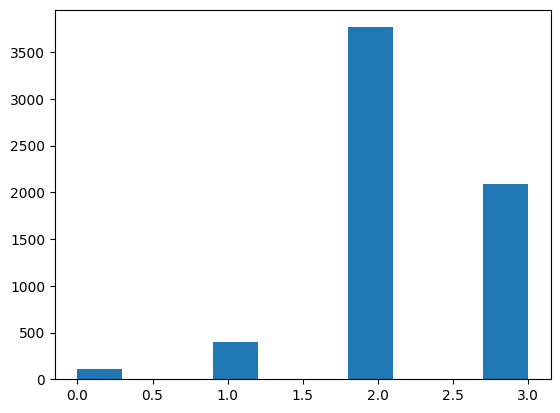

In [44]:
plt.hist(train['Sentiment'])

In [45]:
import re
import string

In [46]:
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("[^-9A-Za-z ]", "" , text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
cleaned = lambda x: text_clean_1(x)

In [47]:
train['Product_Description'] = pd.DataFrame(train.Product_Description.apply(cleaned))
train.head(10)

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,the web designers guide to ios and android app...,9,2
1,6254,rt mention line for ipad is longer today than...,9,2
2,8212,crazy that apple is opening a temporary store ...,9,2
3,4422,the lesson from google one pass in this digita...,9,2
4,5526,rt mention at the panel quotyour mom has an ip...,9,2
5,6064,rt mention i think my effing hubby is in line ...,6,1
6,7713,quotandroid users are not iphone users they us...,9,2
7,2975,wow rtmention we interrupt your regularly sche...,9,3
8,818,google to launch new social network called cir...,9,2
9,1318,mention welcome enjoy sxsw and ride anywhere ...,9,2


In [48]:
test['Product_Description'] = pd.DataFrame(test.Product_Description.apply(cleaned))
test.head(10)

,Text_ID,Product_Description,Product_Type
0,5786,rt mention going to sxsw the new iphone guide ...,7
1,5363,rt mention of iphone and droid apps have less...,9
2,6716,rt mention thank you to mention for letting me...,9
3,4339,thanks mention were lovin the mention app upda...,7
4,66,at sxsw mention mention wanna buy you a drink...,9
5,8373,i just rated gsdampm idea city llc stars ment...,9
6,4264,mention making new fans and friends i hope rt ...,9
7,1982,want a chance to win an ipad while youre at s...,9
8,2258,mention be sure to use our free app for checki...,9
9,8828,free sxsw music sampler on itunes includes men...,4


In [49]:
from sklearn.model_selection import train_test_split

x= train['Product_Description']
y = train['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print('x_train :', len(x_train))
print('x_test  :', len(x_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))

x_train : 5091
x_test  : 1273
y_train : 5091
y_test  : 1273


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(x_train, y_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)

confusion_matrix(predictions, y_test)

array([[  0,   0,   0,   0],
       [  0,   3,   2,   0],
       [ 24,  59, 680, 210],
       [  3,  18,  90, 184]])

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, y_test, average = 'weighted'))

Accuracy :  0.6810683424980362
Precision :  0.7816187192350992
Recall :  0.6810683424980362


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
example = ["happy"]
result = model.predict(example)

print(result)

[2]


In [53]:
test['Sentiment']= model.predict(test.Product_Description)
test

,Text_ID,Product_Description,Product_Type,Sentiment
0,5786,rt mention going to sxsw the new iphone guide ...,7,2
1,5363,rt mention of iphone and droid apps have less...,9,3
2,6716,rt mention thank you to mention for letting me...,9,2
3,4339,thanks mention were lovin the mention app upda...,7,3
4,66,at sxsw mention mention wanna buy you a drink...,9,2
...,...,...,...,...
2723,5705,rt mention eww and lol rt mention just saw a g...,9,2
2724,7556,free track sxsw sampler album on itunes music...,9,2
2725,7302,setting up for the google gsdm sxsw party its...,3,2
2726,5286,rt mention sxsw come see bitbop in austin gdgt...,9,2


In [54]:
submission = pd.DataFrame( model.predict_proba(test))
submission.head()

,0,1,2,3
0,0.022476,0.08447,0.614441,0.278613
1,0.022476,0.08447,0.614441,0.278613
2,0.022476,0.08447,0.614441,0.278613
3,0.022476,0.08447,0.614441,0.278613


In [55]:
submission.to_csv('sample_submission.csv',index=False)
pd.read_csv("./sample_submission.csv")

,0,1,2,3
0,0.022476,0.08447,0.614441,0.278613
1,0.022476,0.08447,0.614441,0.278613
2,0.022476,0.08447,0.614441,0.278613
3,0.022476,0.08447,0.614441,0.278613
